In [30]:
import random
import xgboost
import numpy as np
import pandas as pd
import plotly.express as xp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pandas_datareader import data
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib.ticker import FixedFormatter,FixedLocator
import matplotlib.ticker as ticker
from matplotlib import colors as mcolors
pd.set_option("display.max_rows",100)




In [31]:
df=pd.read_csv("/content/creditcard.csv")
cm=sns.light_palette("Orange",as_cmap=True)
df.head(30).style.background_gradient(cmap=cm)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
5,2.000000,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
6,4.000000,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7.000000,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.800000,0
8,7.000000,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.200000,0
9,9.000000,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.680000,0


In [32]:
pd.DataFrame(df.columns,columns=["name"])

,name
0,Time
1,V1
2,V2
3,V3
4,V4
5,V5
6,V6
7,V7
8,V8
9,V9


In [33]:
pd.DataFrame(df.dtypes,columns=["type"])

,type
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [34]:
df.loc[:,df.columns!="True"].describe().style.background_gradient(cmap=cm)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


**DATA VISUALIZATIONS**

In [36]:
def get_histplot_central_tendency(df, fields):
    for field in fields:
        f, (ax1) = plt.subplots(1,1,figsize=(9,4))
        v_dist_1=df[field].values
        sns.histplot(v_dist_1,ax=ax1,color=get_random_color(),kde=True)

In [41]:
def get_random_color():
  r1=lambda:random.randint(0,255)
  return "#%02x%02x%02x" %(r1(),r1(),r1())

def get_histplot_central_tendency(df:dict,fields:list):
  for fields in fields:
    f, (ax1) = plt.subplots(1,1,figsize=(9,4))
    v_dist_1=df[field].values
    sns.histplot(v_dist_1,ax=ax1,color=get_random_color(),kde=True)

    mean=df[field].mean()
    median=df[field].meadian()
    mode=df[field].mode().values[0]

    ax1.axvline(mean,color="r",linestype="--",label="Mean")
    ax1.axvline(median,color="g",linestype="--",label="Median")
    ax1.axvline(mode,color="b",linestype="--",label="Mode")
    ax1.legend()
    plt.grid()
    plt.title(f"{field} Histogram analysis")

<ipython-input-36-5fb7d99252fb>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



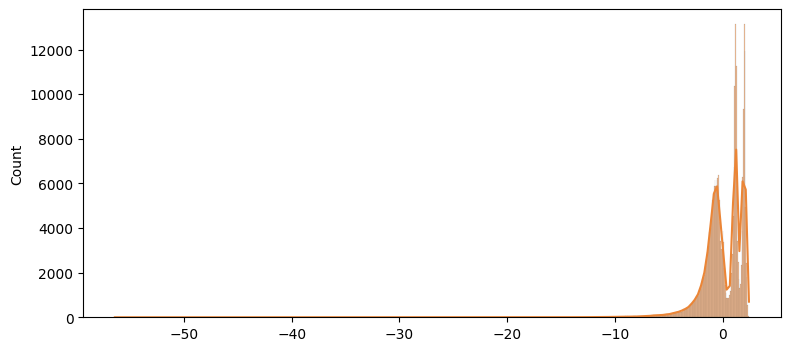

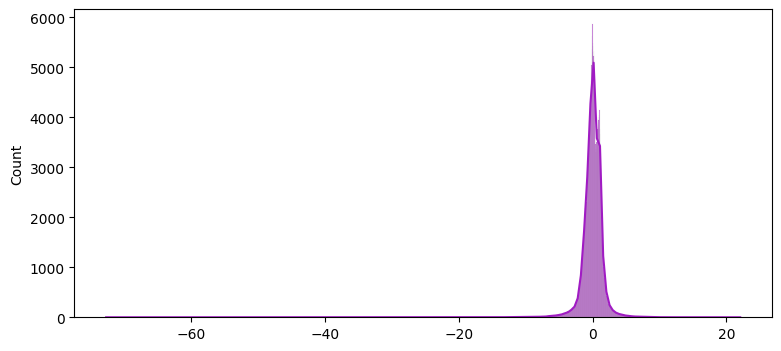

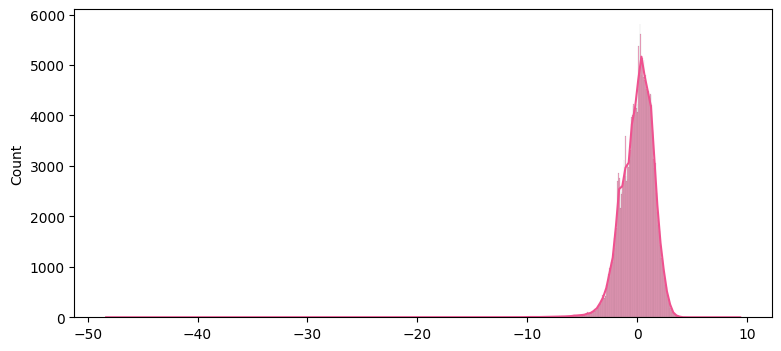

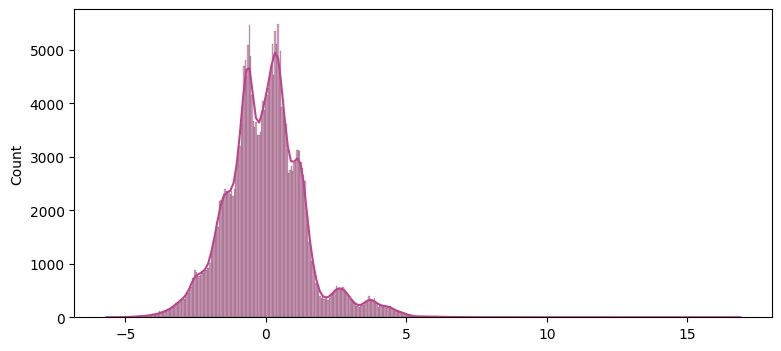

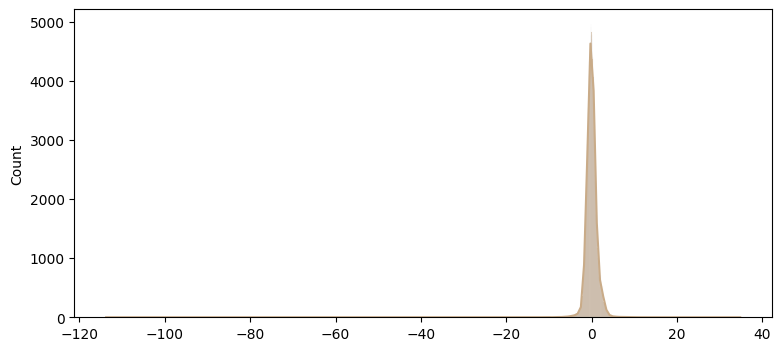

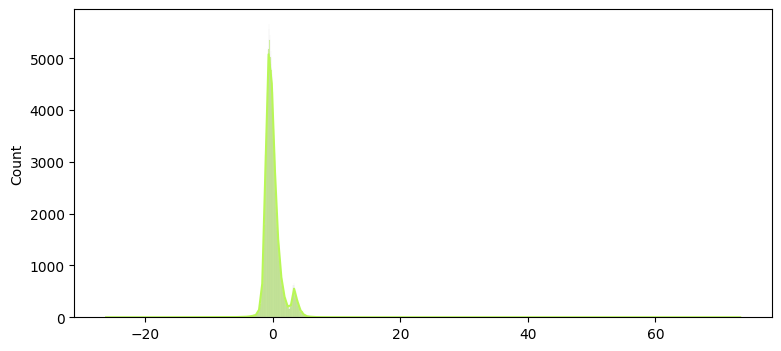

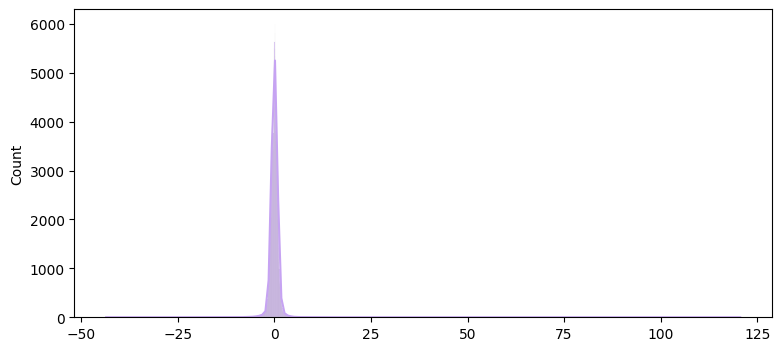

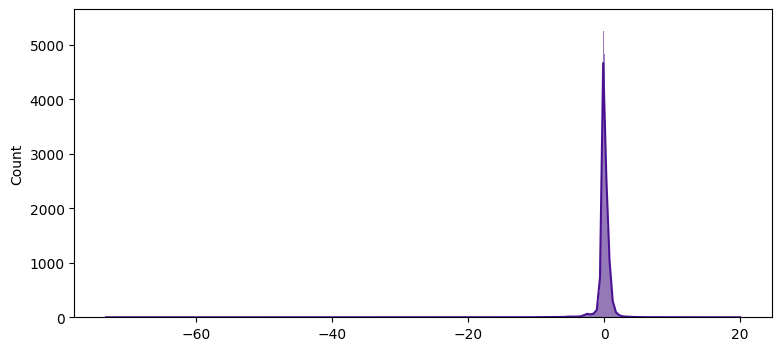

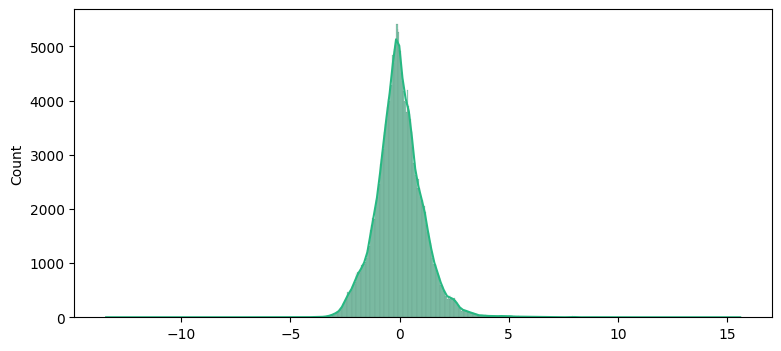

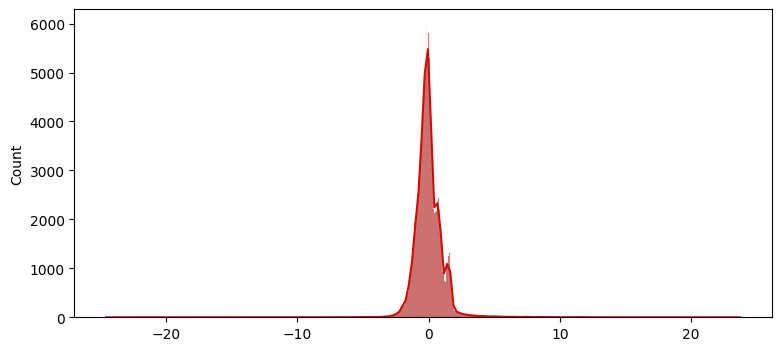

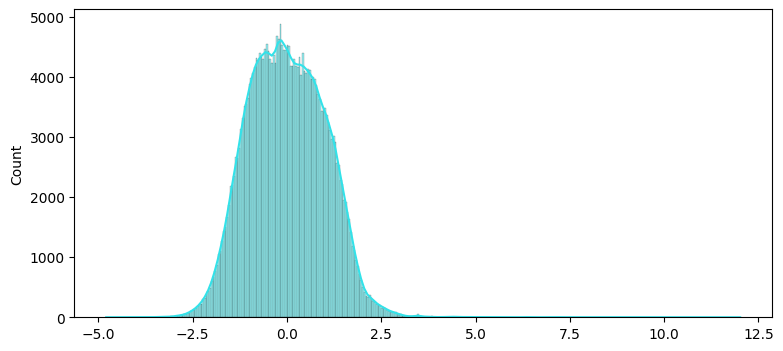

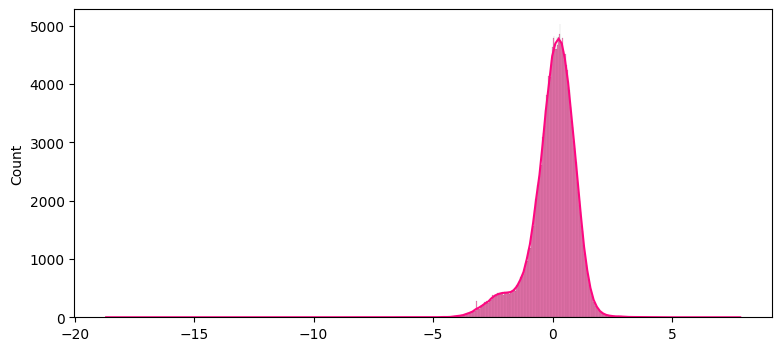

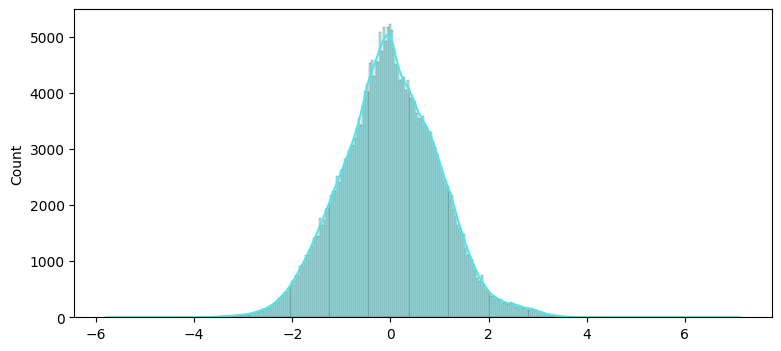

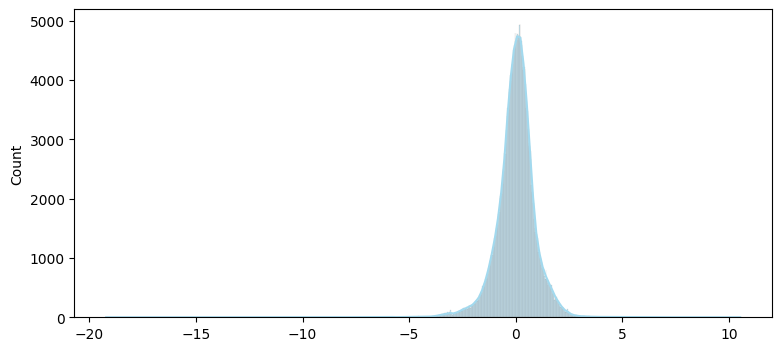

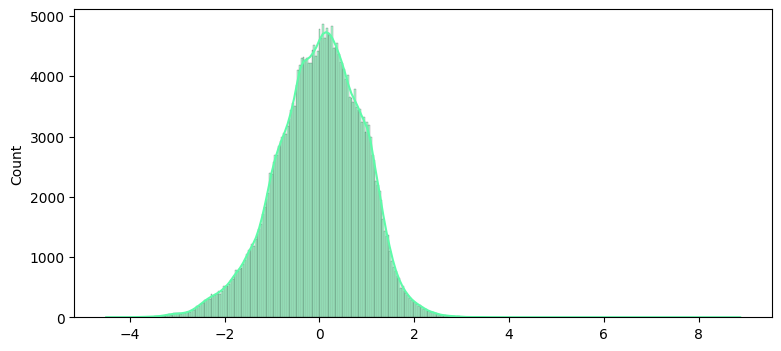

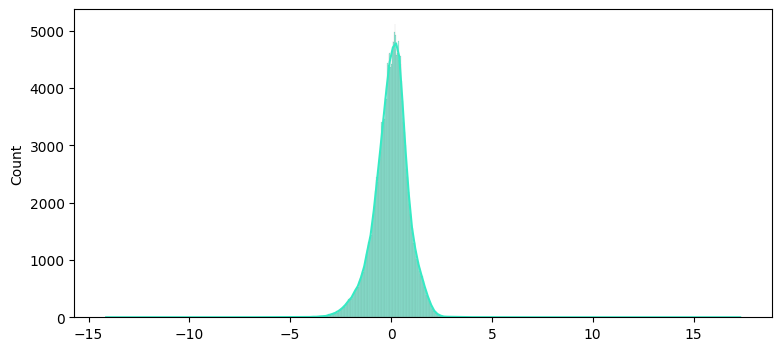

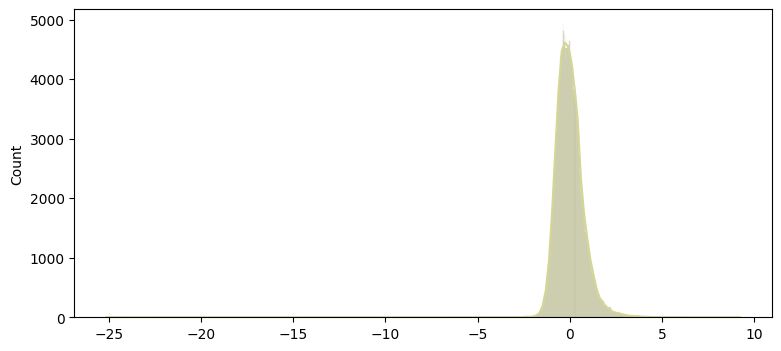

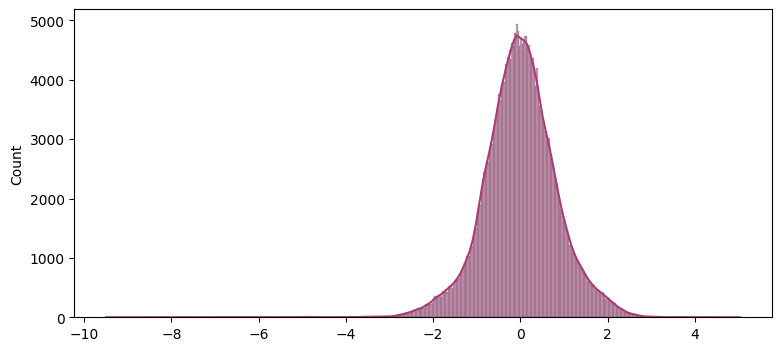

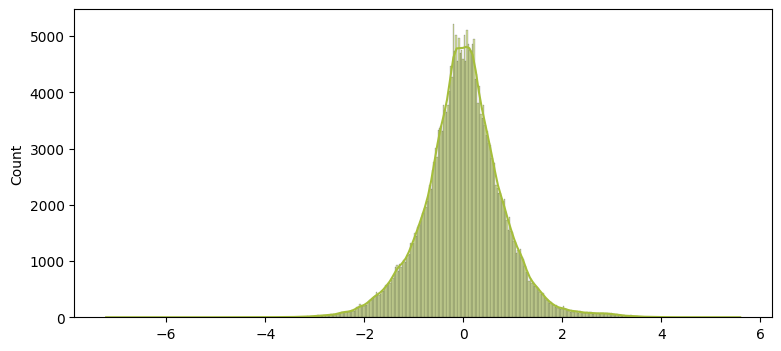

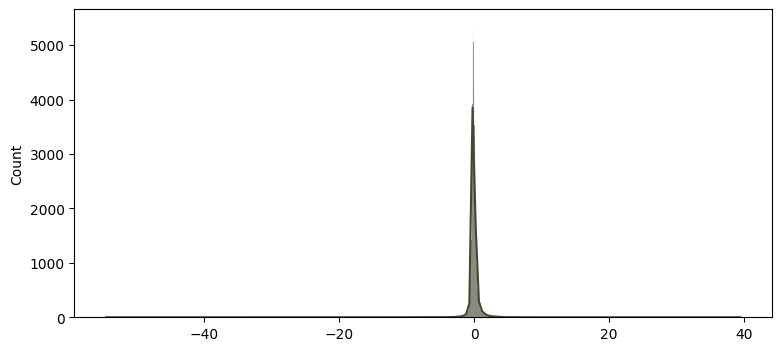

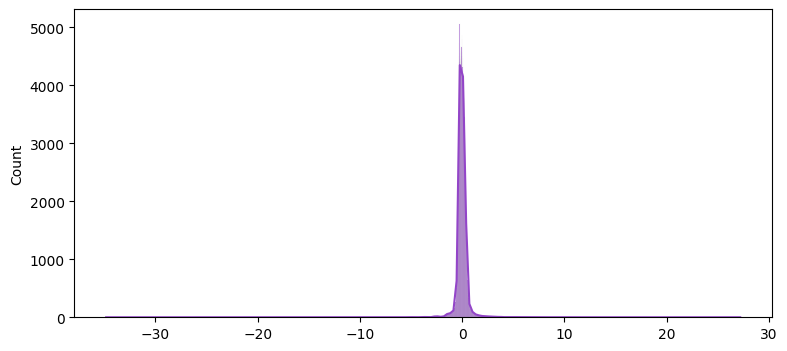

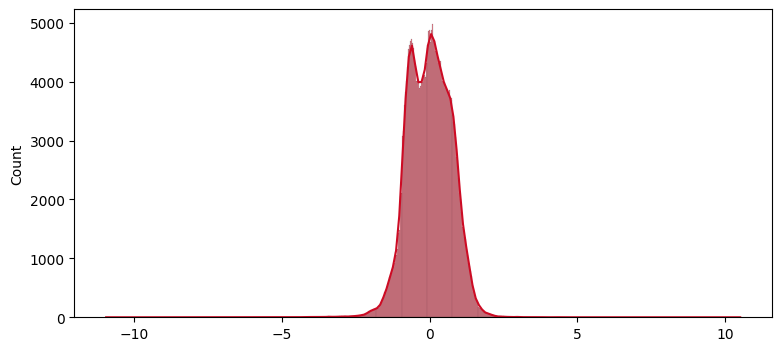

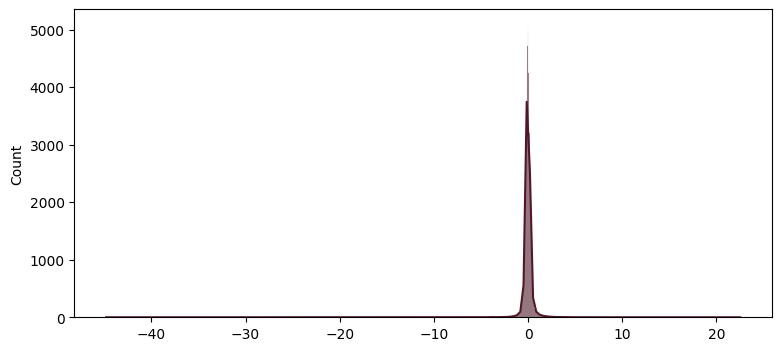

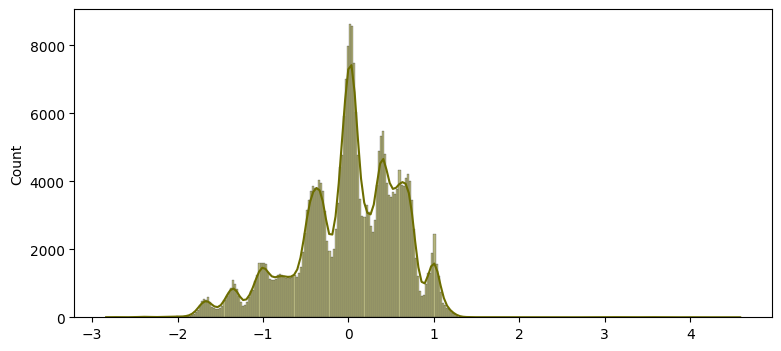

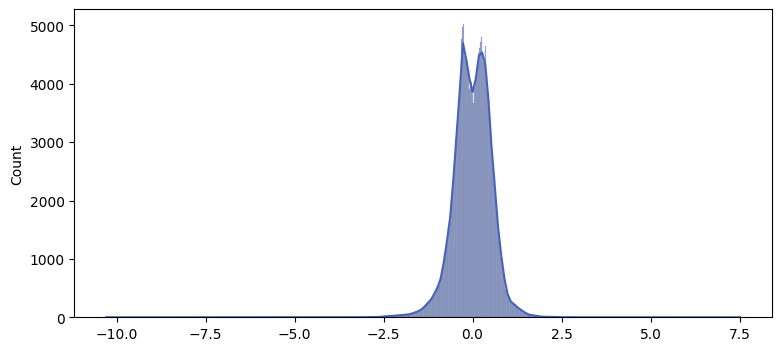

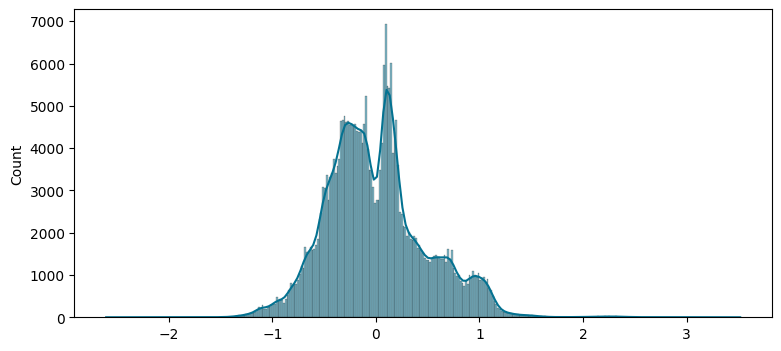

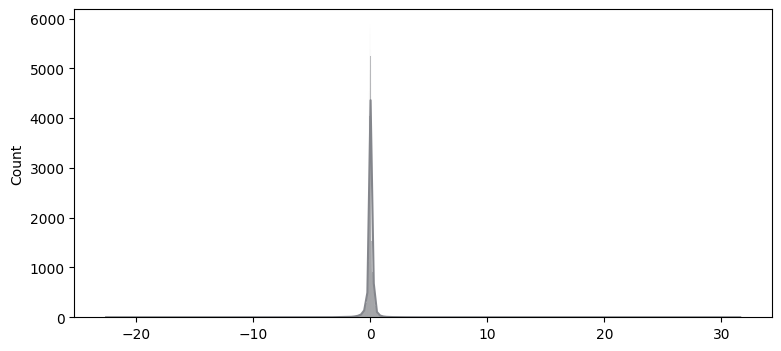

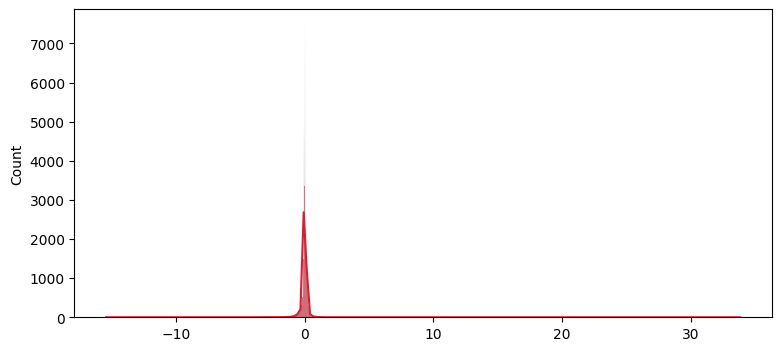

In [40]:
features_v=[f"V{i}" for i in range(1,29)]
get_histplot_central_tendency(df,features_v)

In [42]:
pd.DataFrame(df["Class"].value_counts())

,Class
0,284315
1,492


In [43]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=["count"]).style.background_gradient(cmap=cm)

,count
Time,0
V16,0
Amount,0
V28,0
V27,0
V26,0
V25,0
V24,0
V23,0
V22,0


CORRELATION HEADMAP

In [48]:
def get_headmap_credit(df:dict):
  corr=df.corr()
  plt.figure(figsize=(35,35))
  sns.heatmap(corr,annot=True,cmap="YlGnBu",linewidths=0.1,annot_kws={"fontsize":10})
  plt.title("Correlation house prices-return rate")


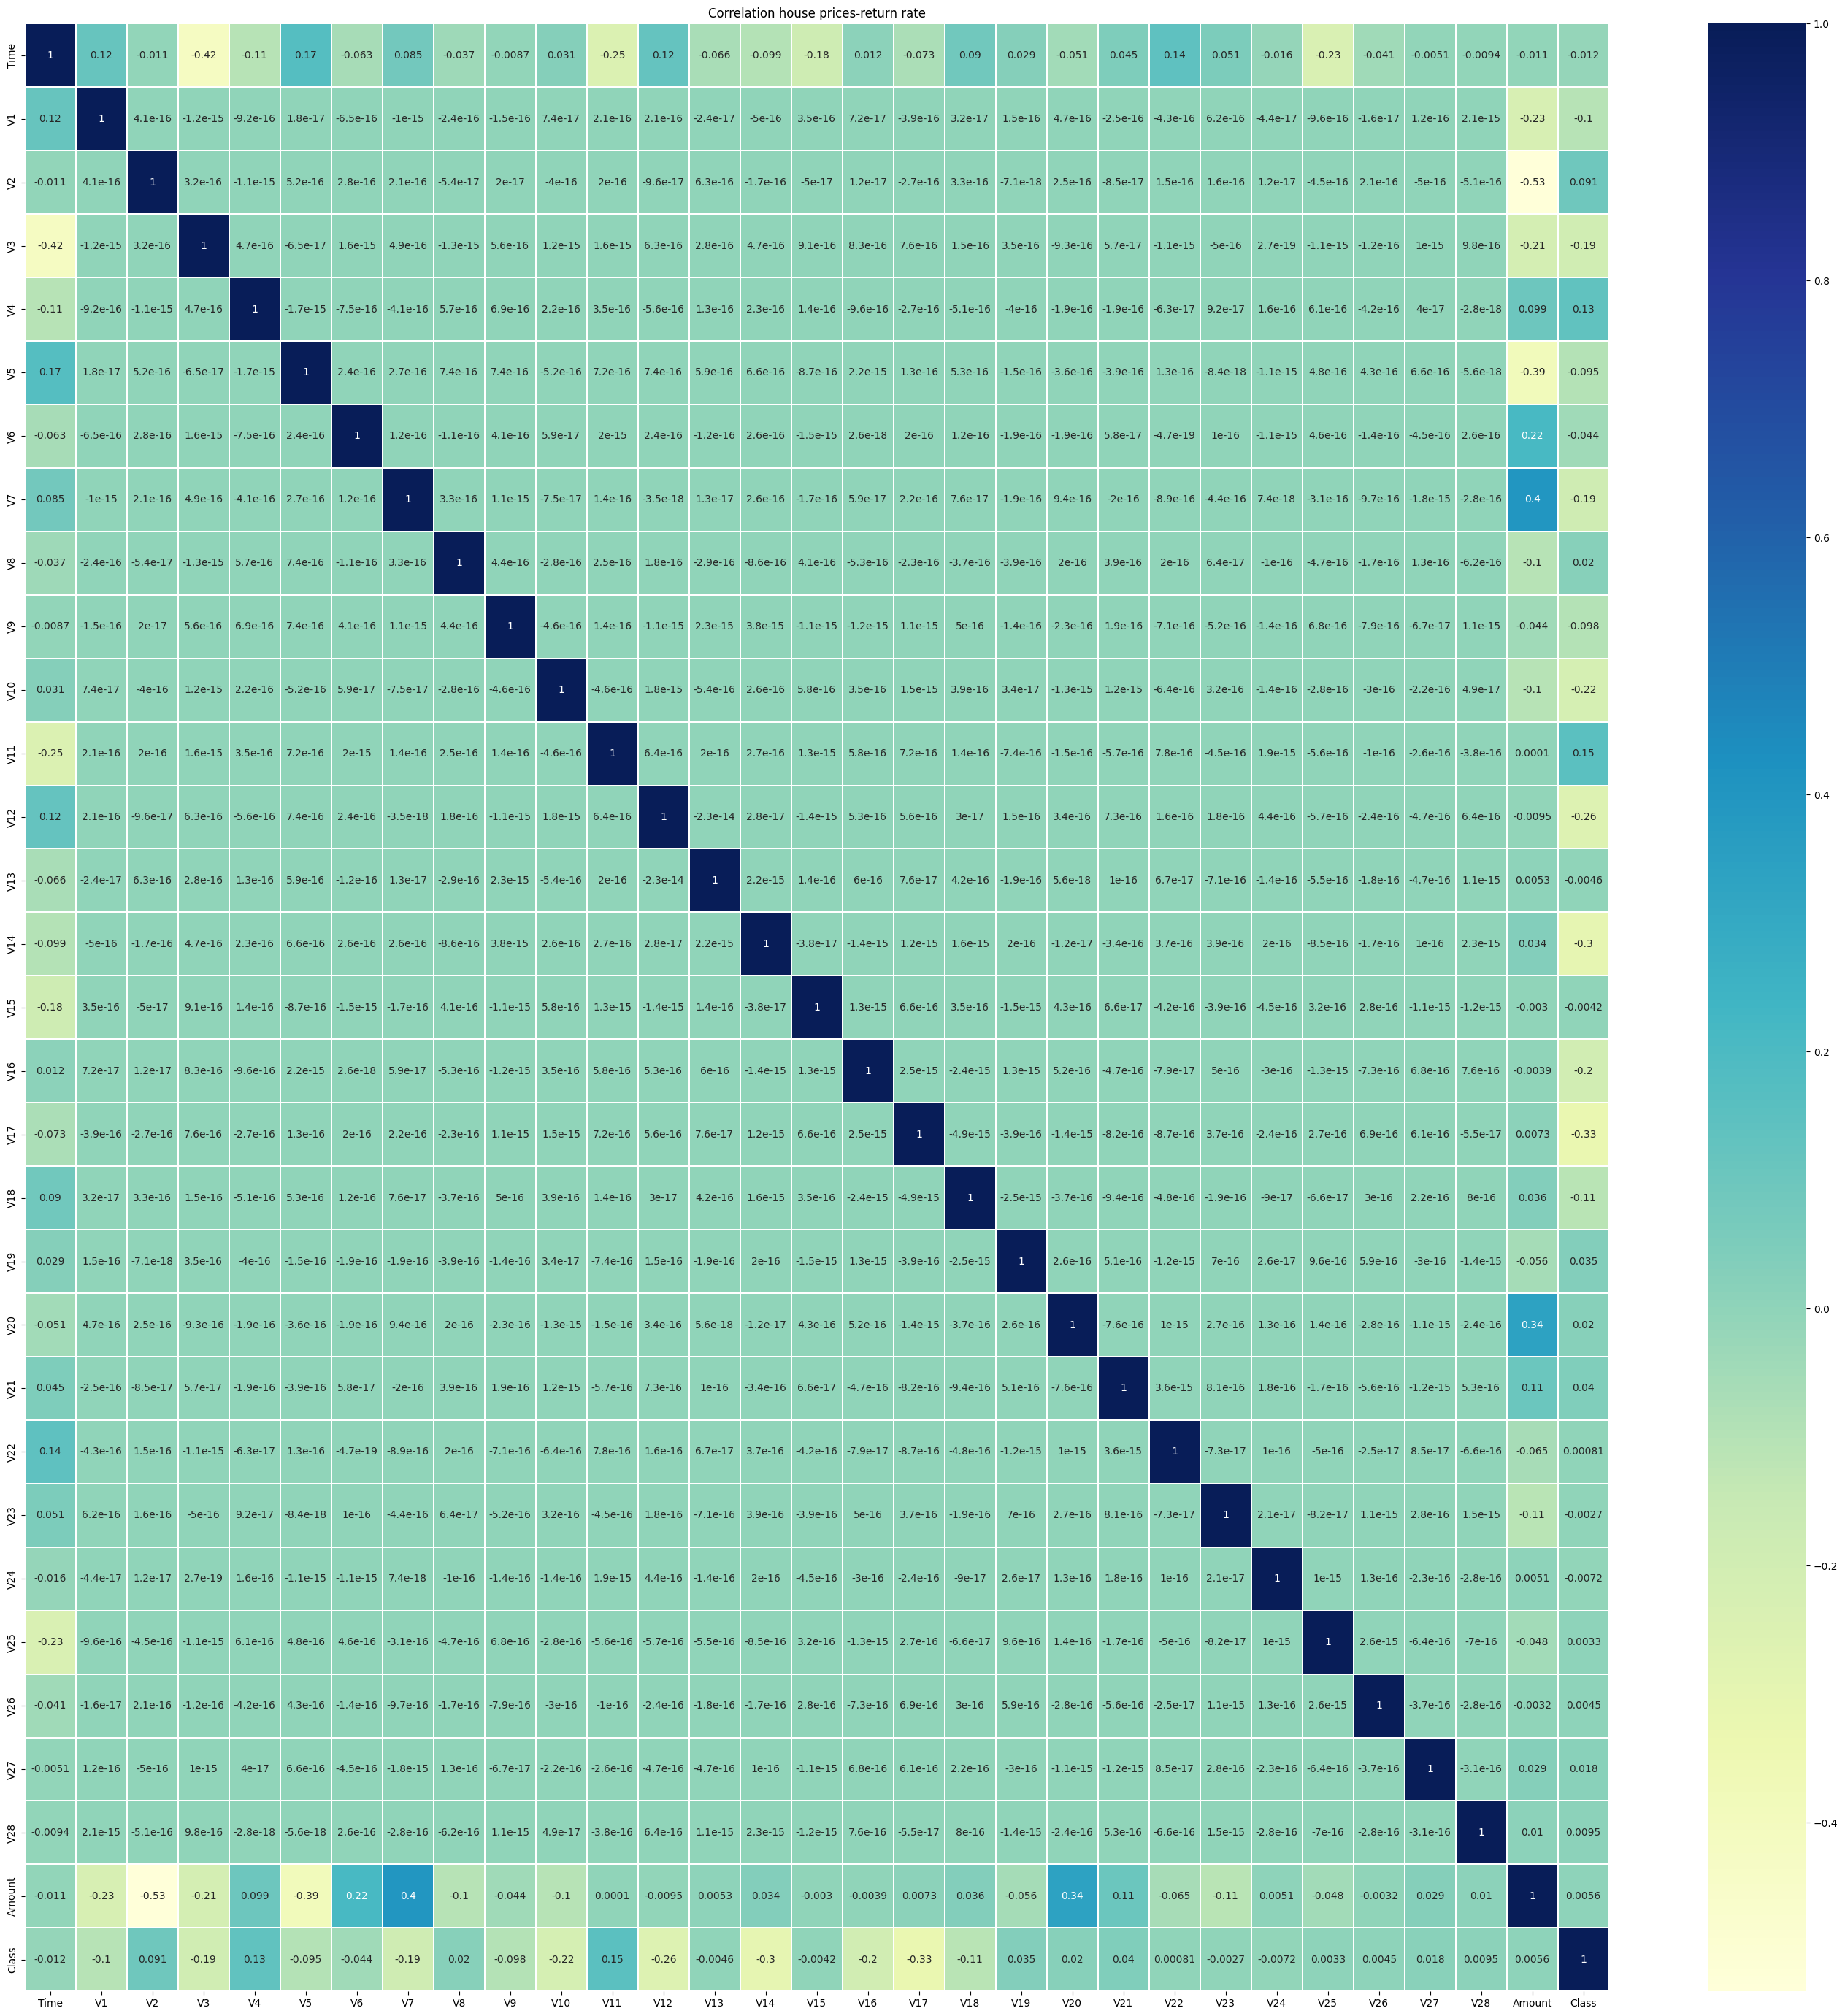

In [49]:
get_headmap_credit(df)

<Axes: xlabel='Amount', ylabel='Class'>

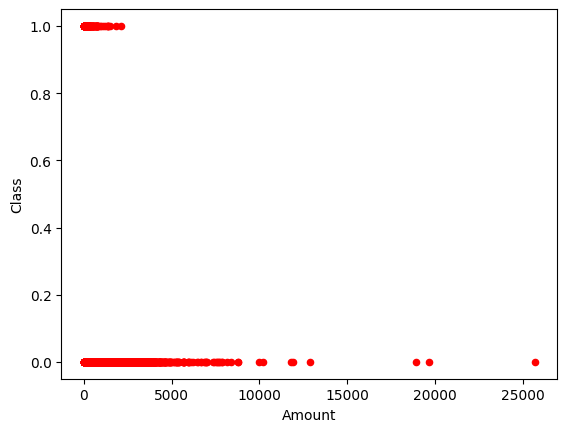

In [52]:
df.plot.scatter(x="Amount",y="Class",color="red")

In [56]:
from sklearn import preprocessing
def preprocessor_min_max(df:dict,fields:list):
  for field in fields:
    min_max=preprocessing.MinMaxScaler()
    scaled=min_max.fit_transform(df[field].values.reshape(-1,1))
    df[f"MinMax_{field}"]=scaled
    return df

In [57]:
df = preprocessor_min_max(df,features_v)

In [58]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,MinMax_V1
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.935192
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.978542
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.935217
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.941878
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.938617


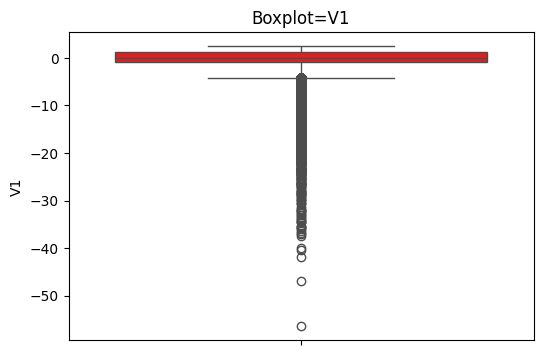

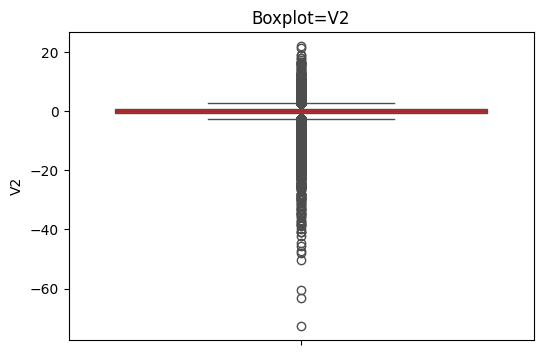

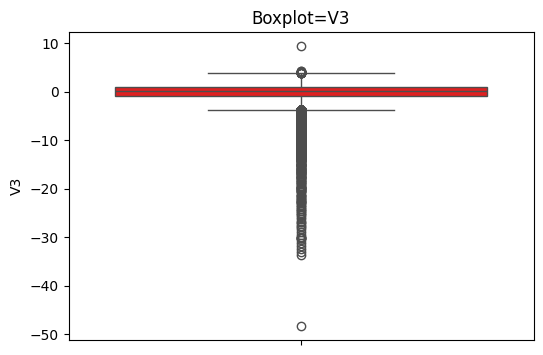

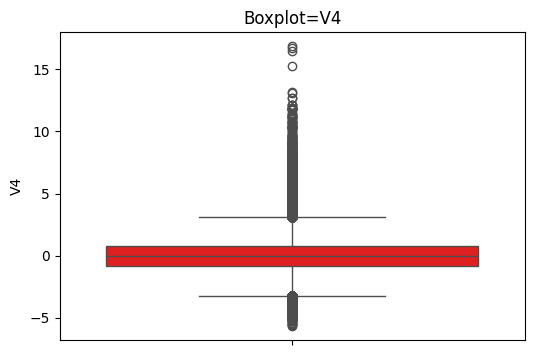

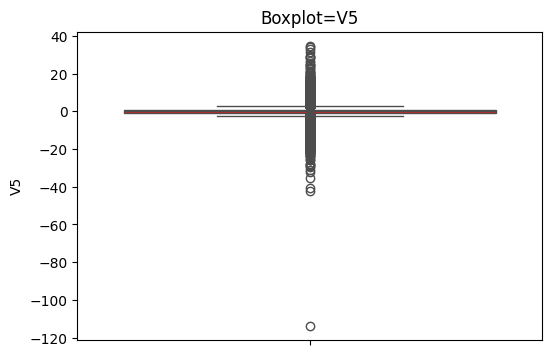

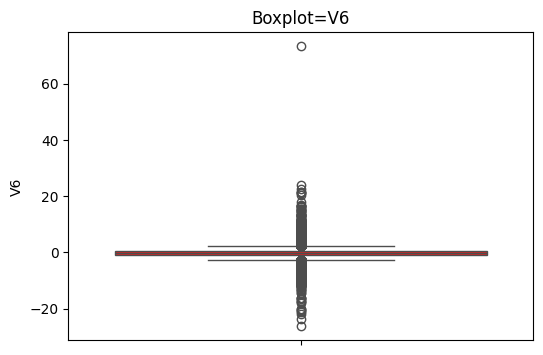

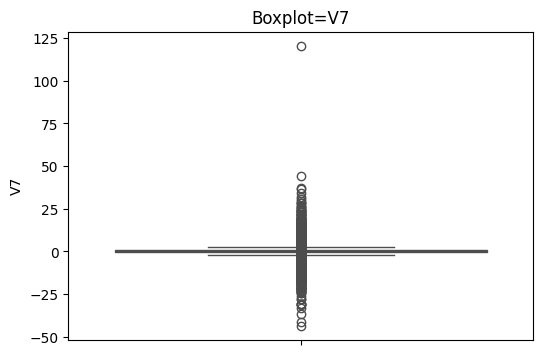

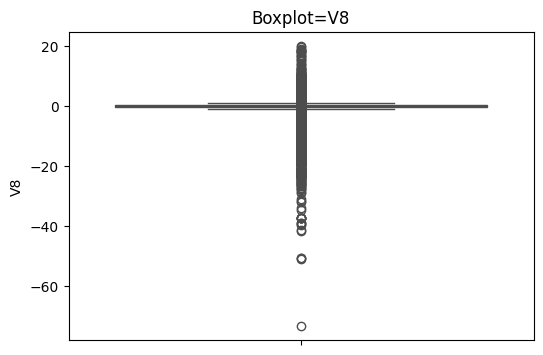

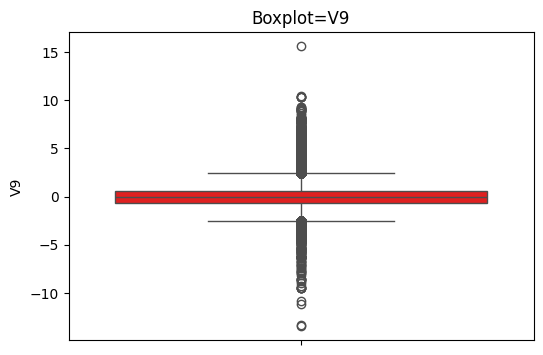

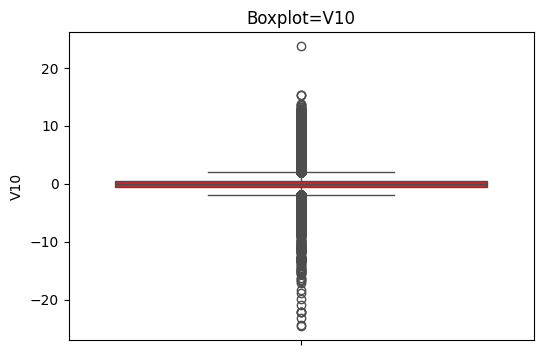

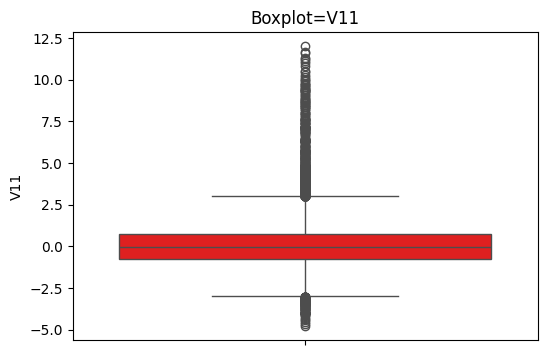

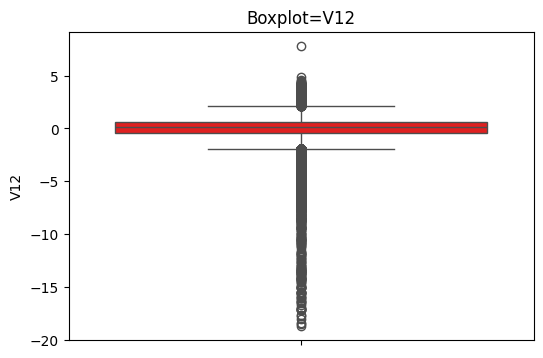

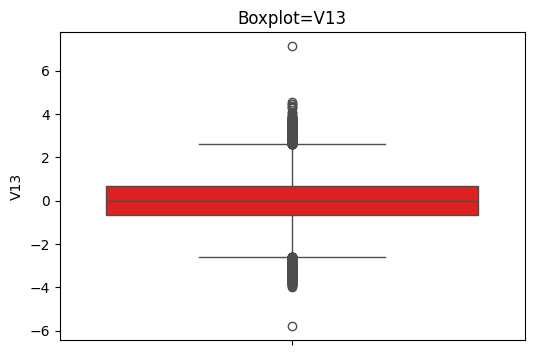

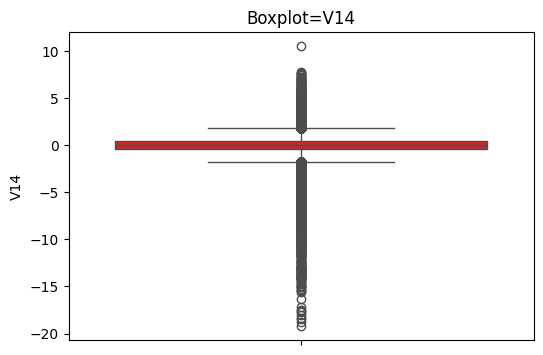

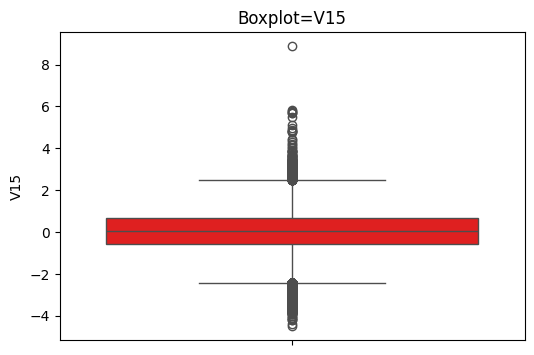

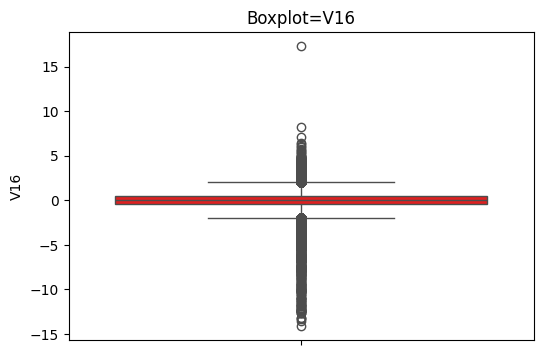

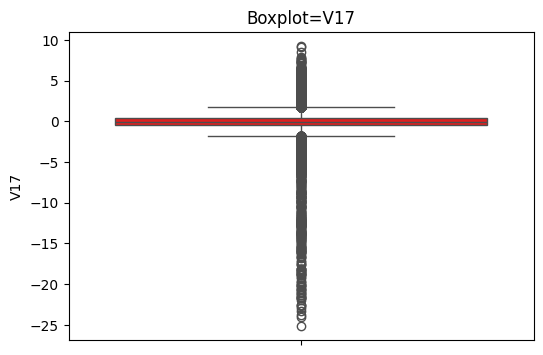

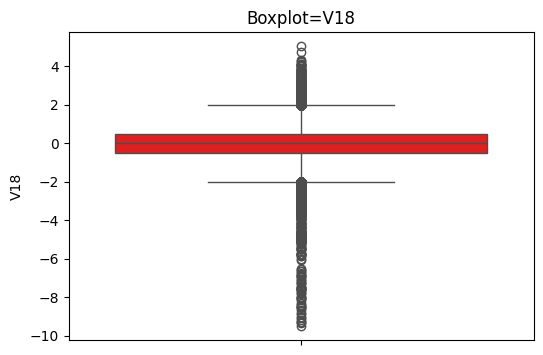

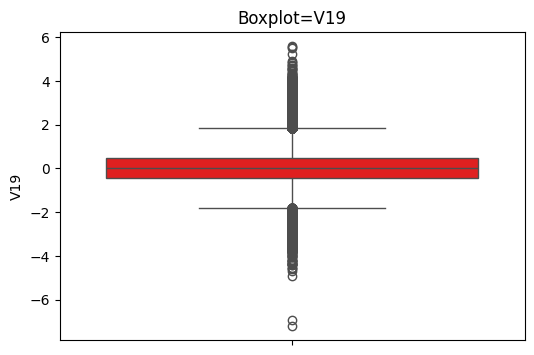

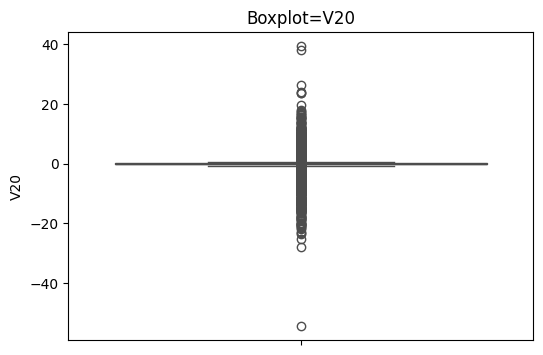

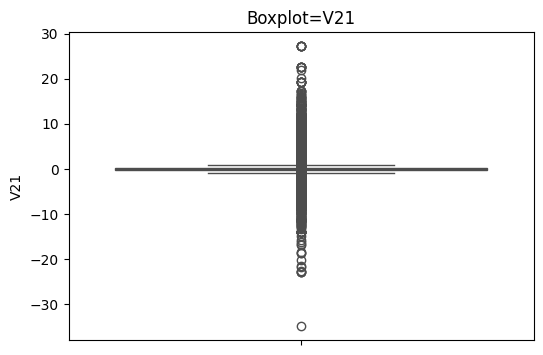

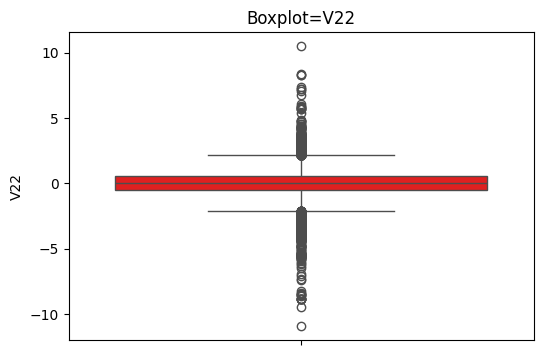

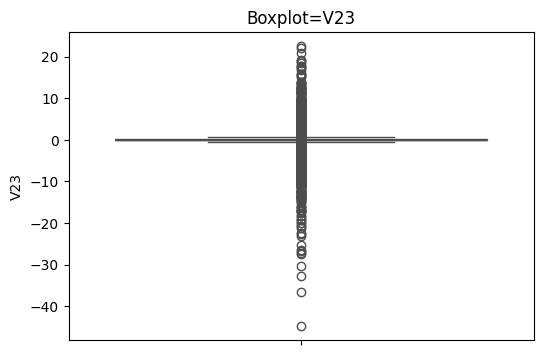

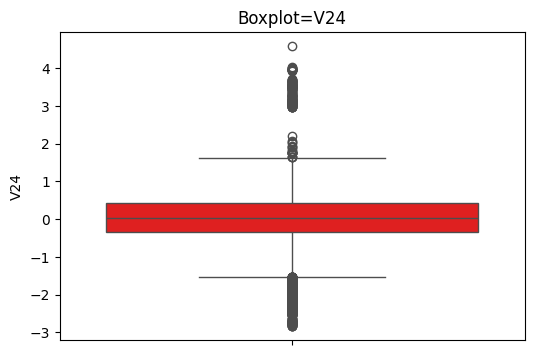

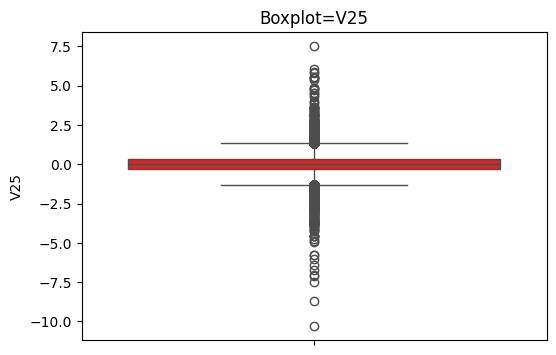

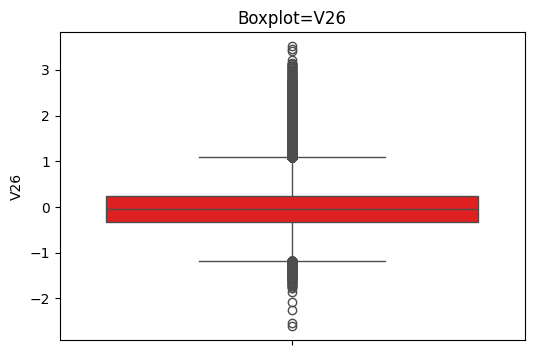

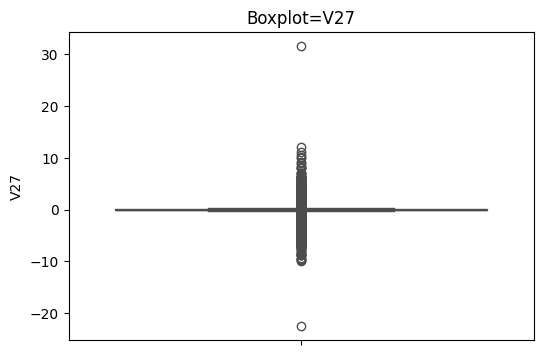

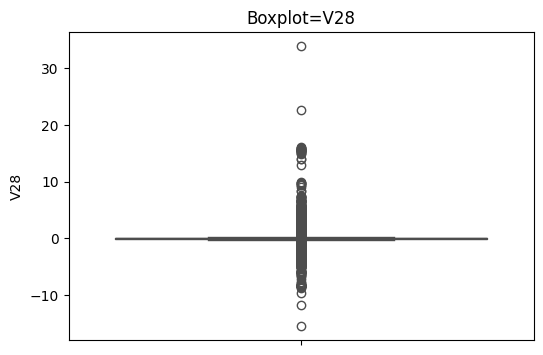

In [66]:
def get_boxplot_price(df:dict,fields:list):
  for field in fields:
    f,ax=plt.subplots(figsize=(6,4))

    fig=sns.boxplot(y=field,data=df,color="red")
    plt.xticks(rotation=90)
    plt.title(f"Boxplot={field}")
    plt.show()
get_boxplot_price(df,features_v)

In [69]:
from imblearn.over_sampling import SMOTE as Smote

y=df["Class"]
x=df[features_v+["Amount"]]

def unbalanced_smote(X_train):
  return Smote().fit_resample(X_train,y_train)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,y_train=unbalanced_smote(x_train)
print(x_train.shape,y_train.shape)


(454902, 29) (454902,)


Text(0.5, 1.0, 'Target count')

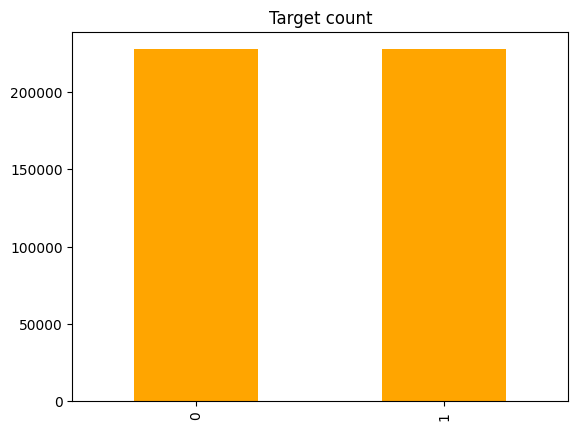

In [70]:
y_train.value_counts().plot(kind="bar",color="orange")
plt.title("Target count")

MODEL TRAINING AND EVALUATION

In [76]:
!pip install xgboost

In [77]:
from xgboost import XGBClassifier

In [78]:
def xgboost():
    return {"xgboost": XGBClassifier(use_label_encoder=False, learning_rate=0.3, n_estimators=300, max_depth=14)}

In [79]:
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter(action="ignore",category=UserWarning)
def logistic_regression():
  return{"LR":LogisticRegression(solver="lbfgs")}

def random_forest():
  return{"random_forest":RandomForestClassifier(criterion="gini",max_depth=None,max_features=8,max_leaf_nodes=None,n_estimators=100)}

def xgboost():
  return{"xgboost":XGBClassifier(use_label_encoder=False,learning_rate=0.3,n_estimators=300,max_depth=14)}


In [80]:
default_model=xgboost()["xgboost"]
default_model.fit(x_train,y_train,eval_metric="rmse")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

IMPORTANCE OF FEATURES

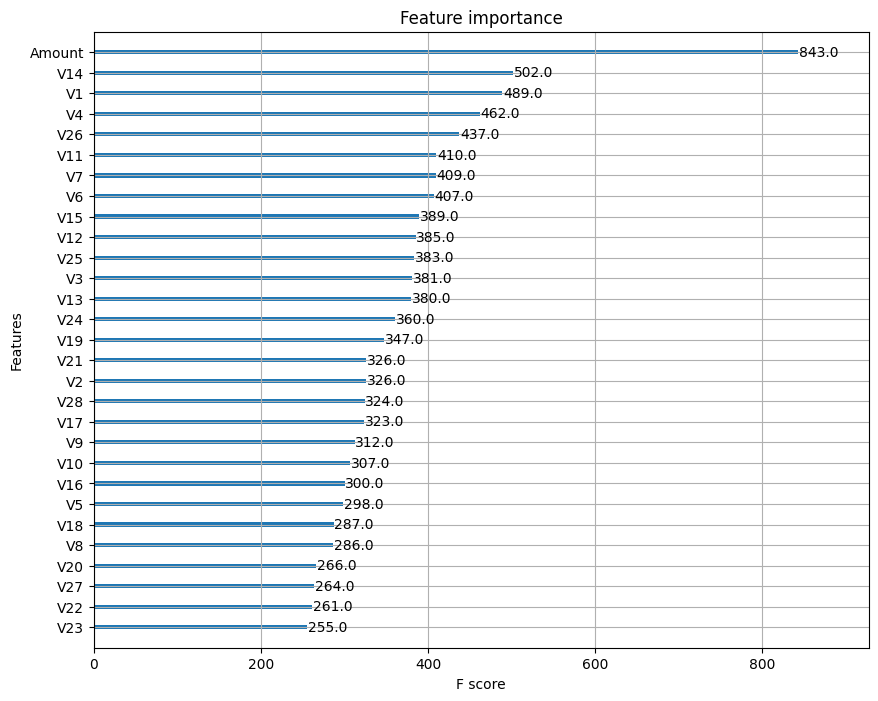

In [86]:
plt.rcParams["figure.figsize"]=(10,8)
plot_importance(default_model,max_num_features=100)
plt.show()

FITTING MODELS

In [95]:
models = {
    "LogisticRegression": LogisticRegression()
}

In [96]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

model_value={"model":[],"log_loss":[],"acc":[]}
for name, model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  score_loss=log_loss(y_test,model.predict_proba(x_test))
  model_value["model"].append(name)
  model_value["log_loss"].append(score_loss)
  model_value["acc"].append(model.score(x_test, y_test))


In [98]:
pd.DataFrame(model_value)

,model,log_loss,acc
0,LogisticRegression,0.093412,0.976634
